In [ ]:
!pip install unidecode

# Data Structures
import numpy  as np
import pandas as pd
import json
# Corpus Processing
import re
import nltk
import nltk.corpus
from nltk.tokenize                    import word_tokenize
from nltk                             import SnowballStemmer
from sklearn.feature_extraction.text  import TfidfVectorizer
from sklearn.preprocessing            import normalize
from unidecode import unidecode
# K-Means
from sklearn import cluster
# hierarchical 
from sklearn.cluster import AgglomerativeClustering

# Visualization and Analysis
import matplotlib.pyplot  as plt
import matplotlib.cm      as cm
import seaborn            as sns
from sklearn.metrics                  import silhouette_samples, silhouette_score
from wordcloud                        import WordCloud


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import files
uploaded = files.upload()

KeyboardInterrupt: ignored

In [ ]:
from IPython.display import display
import pandas as pd
pd.set_option('display.max_colwidth', 300)
df_book = pd.read_excel('gof-problem-domain.xlsx', dtype='string')
df_book.iloc[:2]
df_book['overview'] = df_book['intent'] + " " + df_book['motivation'] + " " + df_book['applicability']

In [ ]:
import pandas as pd

# Source: https://www.geeksforgeeks.org/how-to-merge-multiple-csv-files-into-a-single-pandas-dataframe/
df_gof = pd.read_csv("scraped_pattern_data_gofpatterns_revised.csv")

df_scraped = pd.read_csv("scraped_pattern_data2.csv")
df_scraped['overview'] = df_scraped['intent'] + " " + df_scraped['problem'] + " " + df_scraped['discussion'] + " " + df_scraped['structure']

df_scraped = df_scraped.drop_duplicates(subset=['name'])
df_book = df_book.drop_duplicates(subset=['name'])
df_gof = df_gof.drop_duplicates(subset=['name'])

In [ ]:
print(df_book.info())
print(df_scraped.info())
print(df_gof.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23 entries, 0 to 22
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           23 non-null     string
 1   intent         23 non-null     string
 2   motivation     23 non-null     string
 3   applicability  23 non-null     string
 4   overview       23 non-null     string
dtypes: string(5)
memory usage: 1.1 KB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 23 entries, 0 to 22
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    23 non-null     int64 
 1   Unnamed: 0.1  23 non-null     int64 
 2   id            23 non-null     int64 
 3   category_id   23 non-null     int64 
 4   name          23 non-null     object
 5   intent        23 non-null     object
 6   problem       23 non-null     object
 7   discussion    22 non-null     object
 8   structure     23 non-null

In [ ]:
#df['overview'] = df['intent'] + " " + df['problem'] + " " + df['discussion'] + " " + df['structure']
#df['overview'] = df['intent'] + " " + df['motivation'] + " " + df['applicability']
df = df_book
# df = pd.concat([df,df_book],join='inner')
# df = pd.concat([df,df_scraped],join='inner')
# df.info()

In [ ]:
# Jonathan's cell

# We want to merge df_book, df_scraped, df_gof
# display(df_book[:3])
# display(df_gof[:3])
# display(df_scraped[:3])

In [ ]:
# removes a list of words (ie. stopwords) from a tokenized list.
def removeWords(listOfTokens, listOfWords):
    return [token for token in listOfTokens if token not in listOfWords]

# applies stemming to a list of tokenized words
def applyStemming(listOfTokens, stemmer):
    return [stemmer.stem(token) for token in listOfTokens]

# removes any words composed of less than 2 or more than 21 letters
def twoLetters(listOfTokens):
    twoLetterWord = []
    for token in listOfTokens:
        if len(token) <= 2 or len(token) >= 21:
            twoLetterWord.append(token)
    return twoLetterWord

In [ ]:
nltk.download('stopwords')
def processCorpus(corpus, language):   
    stopwords = nltk.corpus.stopwords.words(language)
    param_stemmer = SnowballStemmer(language)
    
    for document in corpus:
        index = corpus.index(document)
        corpus[index] = str(corpus[index]).replace(u'\ufffd', '8')   # Replaces the ASCII '�' symbol with '8'
        corpus[index] = corpus[index].replace(',', '')          # Removes commas
        corpus[index] = corpus[index].rstrip('\n')              # Removes line breaks
        corpus[index] = corpus[index].casefold()                # Makes all letters lowercase
        
        corpus[index] = re.sub('\W_',' ', corpus[index])        # removes specials characters and leaves only words
        corpus[index] = re.sub("\S*\d\S*"," ", corpus[index])   # removes numbers and words concatenated with numbers IE h4ck3r. Removes road names such as BR-381.
        corpus[index] = re.sub("\S*@\S*\s?"," ", corpus[index]) # removes emails and mentions (words with @)
        corpus[index] = re.sub(r'http\S+', '', corpus[index])   # removes URLs with http
        corpus[index] = re.sub(r'www\S+', '', corpus[index])    # removes URLs with www

        listOfTokens = word_tokenize(corpus[index])
        twoLetterWord = twoLetters(listOfTokens)

        listOfTokens = removeWords(listOfTokens, stopwords)
        listOfTokens = removeWords(listOfTokens, twoLetterWord)
        
        listOfTokens = applyStemming(listOfTokens, param_stemmer)

        corpus[index]   = " ".join(listOfTokens)
        corpus[index] = unidecode(corpus[index])

    return corpus

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
corpus = df['overview'].tolist()
corpus[18][0:447]

'Define a one-to-many dependency between objects so that when one object changes state, all its dependents are notified and updated automatically. A common side-effect of partitioning a system into a collection of cooperating classes is the need to maintain consistency between related objects. You don’t want to achieve consistency by making the classes tightly coupled, because that reduces their reusability.\n\nFor example, many graphical user in'

In [ ]:
import nltk
nltk.download('punkt')

language = 'english'
corpus = processCorpus(corpus, language)
corpus[18][0:460]

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


'defin one-to-mani depend object one object chang state depend notifi updat automat common side-effect partit system collect cooper class need maintain consist relat object want achiev consist make class tight coupl reduc reusabl exampl mani graphic user interfac toolkit separ present aspect user interfac under applic data class defin applic data present reus independ work togeth spreadsheet object bar chart object depict inform applic data object use diffe'

In [ ]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(corpus)
tf_idf = pd.DataFrame(data = X.toarray(), columns=vectorizer.get_feature_names())

final_df = tf_idf

print("{} rows".format(final_df.shape[0]))
final_df.T.nlargest(5, 0)

23 rows


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
feel,0.438059,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0
widget,0.419743,0.033734,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.3017,0.0,0.0,0.0,0.0,0.0,0.0
look,0.387091,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.031683,...,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0
and,0.219029,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0
motif,0.219029,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# first 5 words with highest weight on document 0:
final_df.T.nlargest(5, 0)

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
feel,0.438059,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0
widget,0.419743,0.033734,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.3017,0.0,0.0,0.0,0.0,0.0,0.0
look,0.387091,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.031683,...,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0
and,0.219029,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0
motif,0.219029,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
def run_KMeans(max_k, data):
    max_k += 1
    kmeans_results = dict()
    for k in range(2 , max_k):
        kmeans = cluster.KMeans(n_clusters = k
                               , init = 'k-means++'
                               , n_init = 10
                               , tol = 0.0001
                               #, n_jobs = -1
                               , random_state = 1
                               , algorithm = 'full')

        kmeans_results.update( {k : kmeans.fit(data)} )
        
    return kmeans_results

In [ ]:
def printAvg(avg_dict):
    for avg in sorted(avg_dict.keys(), reverse=True):
        print("Avg: {}\tK:{}".format(avg.round(4), avg_dict[avg]))
        
def plotSilhouette(df, n_clusters, kmeans_labels, silhouette_avg):
    fig, ax1 = plt.subplots(1)
    fig.set_size_inches(8, 6)
    ax1.set_xlim([-0.2, 1])
    ax1.set_ylim([0, len(df) + (n_clusters + 1) * 10])
    
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--") # The vertical line for average silhouette score of all the values
    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.2, 0, 0.2, 0.4, 0.6, 0.8, 1])
    plt.title(("Silhouette analysis for K = %d" % n_clusters), fontsize=10, fontweight='bold')
    
    y_lower = 10
    sample_silhouette_values = silhouette_samples(df, kmeans_labels) # Compute the silhouette scores for each sample
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[kmeans_labels == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i)) # Label the silhouette plots with their cluster numbers at the middle
        y_lower = y_upper + 10  # Compute the new y_lower for next plot. 10 for the 0 samples
    plt.show()
    
        
def silhouette(kmeans_dict, df, plot=False):
    df = df.to_numpy()
    avg_dict = dict()
    for n_clusters, kmeans in kmeans_dict.items():      
        kmeans_labels = kmeans.predict(df)
        silhouette_avg = silhouette_score(df, kmeans_labels) # Average Score for all Samples
        avg_dict.update( {silhouette_avg : n_clusters} )
    
        if(plot): plotSilhouette(df, n_clusters, kmeans_labels, silhouette_avg)

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


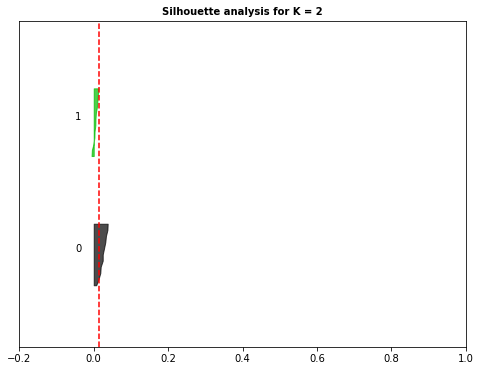

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


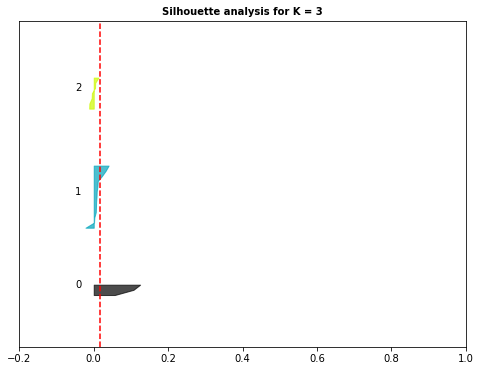

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


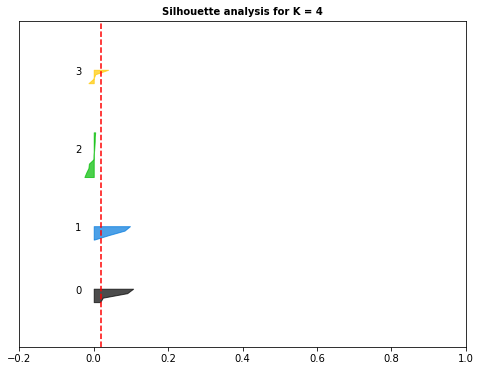

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


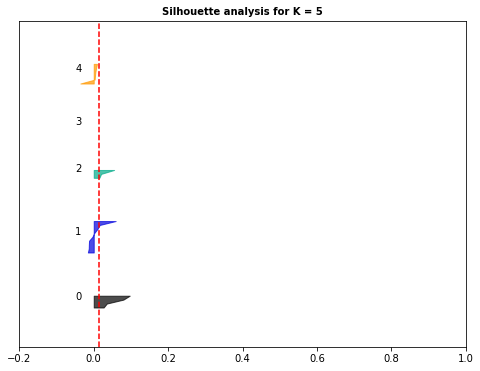

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


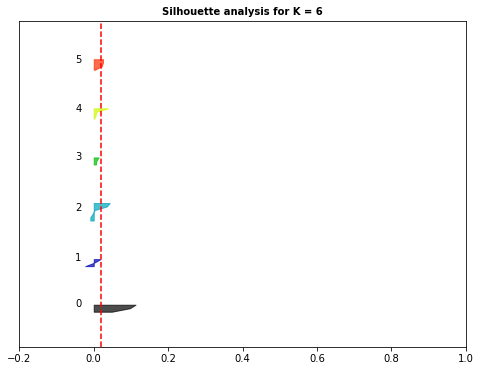

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


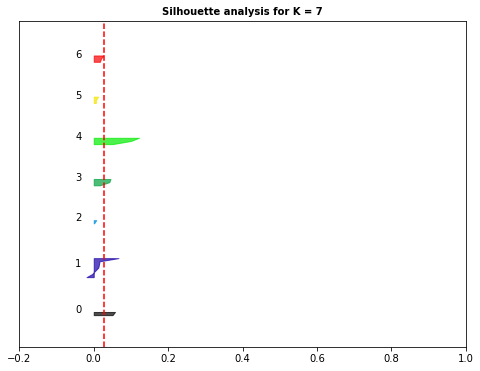

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


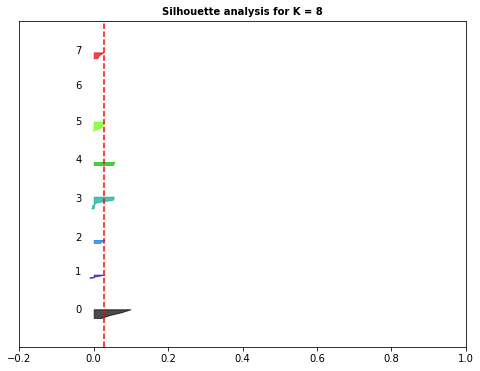

In [ ]:
# Running Kmeans
k = 8
kmeans_results = run_KMeans(k, final_df)

# Plotting Silhouette Analysis
silhouette(kmeans_results, final_df, plot=True)

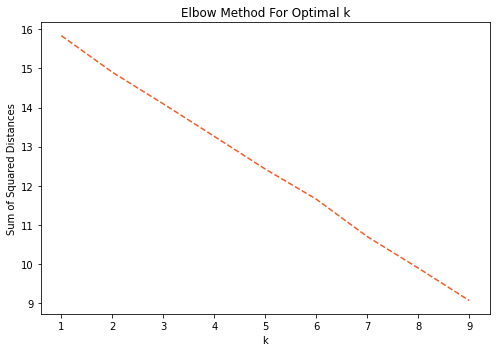

In [ ]:
# Use the elbow method to automatically determine the best number of clusters (the number of design pattern categories to consider)?
# Source: https://github.com/broepke/TextClustering/blob/main/text_clustering.ipynb

from sklearn.cluster import KMeans

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['overview'].values.astype('U'))

Sum_of_squared_distances = []
K = range(1,10)
for k in K:
    km = KMeans(init="k-means++", n_clusters=k)
    km = km.fit(X)
    Sum_of_squared_distances.append(km.inertia_)

plt.figure(figsize=(7,5))
ax = sns.lineplot(x=K, y=Sum_of_squared_distances)
#732F2F
ax.lines[0].set_linestyle("--")
ax.lines[0].set_color("#F25D27")

# Add a vertical line to show the optimum number of clusters
#plt.axvline(2, color='#1A2226', linestyle=':')

plt.xlabel('k')
plt.ylabel('Sum of Squared Distances')
plt.title('Elbow Method For Optimal k')

plt.tight_layout()
plt.savefig('textclustering_elbow.png', dpi=300)
plt.show();

In [ ]:
def get_top_features_cluster(tf_idf_array, prediction, n_feats):
    labels = np.unique(prediction)
    dfs = []
    for label in labels:
        id_temp = np.where(prediction==label) # indices for each cluster
        x_means = np.mean(tf_idf_array[id_temp], axis = 0) # returns average score across cluster
        sorted_means = np.argsort(x_means)[::-1][:n_feats] # indices with top 20 scores
        features = vectorizer.get_feature_names()
        best_features = [(features[i], x_means[i]) for i in sorted_means]
        df = pd.DataFrame(best_features, columns = ['features', 'score'])
        dfs.append(df)
    return dfs

def plotWords(dfs, n_feats):
    plt.figure(figsize=(8, 4))
    for i in range(0, len(dfs)):
        plt.title(("Most Common Words in Cluster {}".format(i)), fontsize=10, fontweight='bold')
        sns.barplot(x = 'score' , y = 'features', orient = 'h' , data = dfs[i][:n_feats])
        plt.show()

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


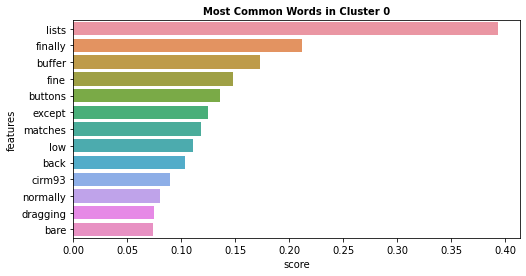

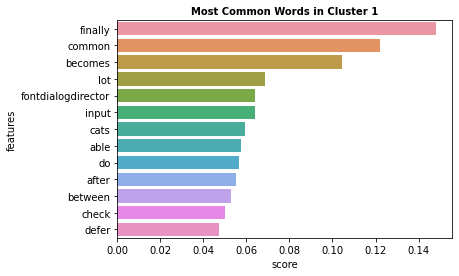

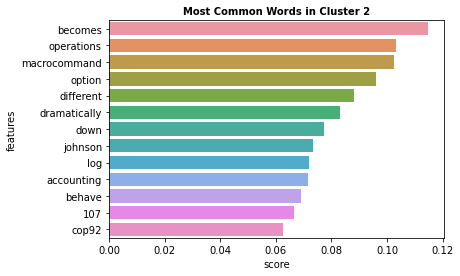

In [ ]:
best_result = 3
kmeans = kmeans_results.get(best_result)

final_df_array = final_df.to_numpy()
prediction = kmeans.predict(final_df)
n_feats = 20
dfs = get_top_features_cluster(final_df_array, prediction, n_feats)
plotWords(dfs, 13)

In [ ]:
# Transforms a centroids dataframe into a dictionary to be used on a WordCloud.
def centroidsDict(centroids, index):
    a = centroids.T[index].sort_values(ascending = False).reset_index().values
    centroid_dict = dict()

    for i in range(0, len(a)):
        centroid_dict.update( {a[i,0] : a[i,1]} )

    return centroid_dict

def generateWordClouds(centroids):
    wordcloud = WordCloud(max_font_size=100, background_color = 'white')
    for i in range(0, len(centroids)):
        centroid_dict = centroidsDict(centroids, i)        
        wordcloud.generate_from_frequencies(centroid_dict)

        plt.figure()
        plt.title('Cluster {}'.format(i))
        plt.imshow(wordcloud)
        plt.axis("off")
        plt.show()

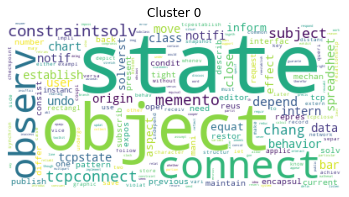

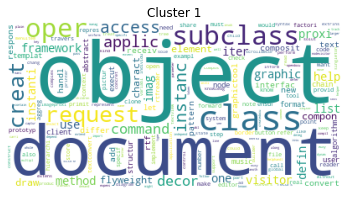

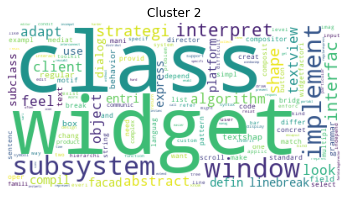

In [ ]:
centroids = pd.DataFrame(kmeans.cluster_centers_)
centroids.columns = final_df.columns
generateWordClouds(centroids)

In [ ]:
# Assigning the cluster labels to each pattern
labels = kmeans.labels_ 
df['label'] = labels
df

,name,intent,motivation,applicability,overview,label,fuzzLabels
0,abstract factory,Provide an interface for creating families of related or dependent objects without specifying their concrete classes.,"Consider a user interface toolkit that supports multiple look-and-feel standards, such as Motif and Presentation Manager. Different look-and-feels define different appearances and behaviors for user interface “widgets” like scroll bars, windows, and buttons. To be portable across look-and-feel s...","Use the Abstract Factory pattern when • a system should be independent of how its products are created, composed, and represented. • a system should be configured with one of multiple families of products. • a family of related product objects is designed to be used together, and you need to ...","Provide an interface for creating families of related or dependent objects without specifying their concrete classes. Consider a user interface toolkit that supports multiple look-and-feel standards, such as Motif and Presentation Manager. Different look-and-feels define different appearances an...",2,1
1,builder,Separate the construction of a complex object from its representation so that the same construction process can create different representations.,"A reader for the RTF (Rich Text Format) document exchange format should be able to convert RTF to many text formats. The reader might convert RTF documents into plain ASCII text or into a text widget that can be edited interactively. The problem, however, is that the number of possible conversio...",Use the Builder pattern when • the algorithm for creating a complex object should be independent of the parts that make up the object and how they’re assembled. • the construction process must allow different representations for the object that’s constructed.,Separate the construction of a complex object from its representation so that the same construction process can create different representations. A reader for the RTF (Rich Text Format) document exchange format should be able to convert RTF to many text formats. The reader might convert RTF docu...,1,1
2,factory method,"Define an interface for creating an object, but let subclasses decide which class to instantiate. Factory Method lets a class defer instantiation to subclasses.",Frameworks use abstract classes to define and maintain relationships between objects. A framework is often responsible for creating these objects as well. Consider a framework for applications that can present multiple documents to the user. Two key abstractions in this framework are the classe...,"Use the Factory Method pattern when • a class can’t anticipate the class of objects it must create. • a class wants its subclasses to specify the objects it creates. • classes delegate responsibility to one of several helper subclasses, and you want to localize the knowledge of which helper s...","Define an interface for creating an object, but let subclasses decide which class to instantiate. Factory Method lets a class defer instantiation to subclasses. Frameworks use abstract classes to define and maintain relationships between objects. A framework is often responsible for creating the...",1,1
3,prototype,"Specify the kinds of objects to create using a prototypical instance, and create new objects by copying this prototype.","You could build an editor for music scores by customizing a general framework for graphical editors and adding new objects that represent notes, rests, and staves. The editor framework may have a palette of tools for adding these music objects to the score. The palette would also include tools f...","Use the Prototype pattern when a system should be independent of how its products are created, composed, and represented; and • when the classes to instantiate are specified at run-time, for example, by dynamic loading; or • to avoid building a class hierarchy of factories that parallels the c...","Specify the kinds of objects to create using a pr

In [ ]:
print("Cluster centroids: \n")
order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
tempk = 3
for i in range(tempk):
  print("Cluster %d:" % i)
  for j in order_centroids[i, :10]: #print out 10 features terms of each cluster
    print('%s'% terms[j])
  print('------------------')

Cluster centroids: 

Cluster 0:
lists
finally
buffer
fine
buttons
except
matches
low
back
cirm93
------------------
Cluster 1:
finally
common
becomes
lot
fontdialogdirector
input
cats
able
do
after
------------------
Cluster 2:
becomes
operations
macrocommand
option
different
dramatically
down
johnson
log
accounting
------------------


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
!pip install fuzzy-c-means
from fcmeans import FCM

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
my_model = FCM(n_clusters=3) # we use three cluster as an example
my_model.fit(final_df_array) ## X, numpy array. rows:samples columns:features
centers = my_model.centers
fuzzLabels = my_model.predict(final_df_array)

df['fuzzLabels'] = fuzzLabels
df

,name,intent,motivation,applicability,overview,label,fuzzLabels
0,abstract factory,Provide an interface for creating families of related or dependent objects without specifying their concrete classes.,"Consider a user interface toolkit that supports multiple look-and-feel standards, such as Motif and Presentation Manager. Different look-and-feels define different appearances and behaviors for user interface “widgets” like scroll bars, windows, and buttons. To be portable across look-and-feel s...","Use the Abstract Factory pattern when • a system should be independent of how its products are created, composed, and represented. • a system should be configured with one of multiple families of products. • a family of related product objects is designed to be used together, and you need to ...","Provide an interface for creating families of related or dependent objects without specifying their concrete classes. Consider a user interface toolkit that supports multiple look-and-feel standards, such as Motif and Presentation Manager. Different look-and-feels define different appearances an...",2,0
1,builder,Separate the construction of a complex object from its representation so that the same construction process can create different representations.,"A reader for the RTF (Rich Text Format) document exchange format should be able to convert RTF to many text formats. The reader might convert RTF documents into plain ASCII text or into a text widget that can be edited interactively. The problem, however, is that the number of possible conversio...",Use the Builder pattern when • the algorithm for creating a complex object should be independent of the parts that make up the object and how they’re assembled. • the construction process must allow different representations for the object that’s constructed.,Separate the construction of a complex object from its representation so that the same construction process can create different representations. A reader for the RTF (Rich Text Format) document exchange format should be able to convert RTF to many text formats. The reader might convert RTF docu...,1,1
2,factory method,"Define an interface for creating an object, but let subclasses decide which class to instantiate. Factory Method lets a class defer instantiation to subclasses.",Frameworks use abstract classes to define and maintain relationships between objects. A framework is often responsible for creating these objects as well. Consider a framework for applications that can present multiple documents to the user. Two key abstractions in this framework are the classe...,"Use the Factory Method pattern when • a class can’t anticipate the class of objects it must create. • a class wants its subclasses to specify the objects it creates. • classes delegate responsibility to one of several helper subclasses, and you want to localize the knowledge of which helper s...","Define an interface for creating an object, but let subclasses decide which class to instantiate. Factory Method lets a class defer instantiation to subclasses. Frameworks use abstract classes to define and maintain relationships between objects. A framework is often responsible for creating the...",1,1
3,prototype,"Specify the kinds of objects to create using a prototypical instance, and create new objects by copying this prototype.","You could build an editor for music scores by customizing a general framework for graphical editors and adding new objects that represent notes, rests, and staves. The editor framework may have a palette of tools for adding these music objects to the score. The palette would also include tools f...","Use the Prototype pattern when a system should be independent of how its products are created, composed, and represented; and • when the classes to instantiate are specified at run-time, for example, by dynamic loading; or • to avoid building a class hierarchy of factories that parallels the c...","Specify the kinds of objects to create using a pr

In [ ]:
# initialize test data
data = ["Design a drawing editor. A design is composed of te graphics (lines, rectangles and roses), positioned at precise positions. Each graphic form must be modeled by a class that provides a method draw(): void. A rose is a complex graphic designed by a black-box class component. This component performs this drawing in memory, and provides access through a method getRose(): int that returns the address of the drawing. It is probable that the system evolves in order to draw circles."]

# Create test data frame
#dfTest = pd.DataFrame(data, columns=['TestDesignProblem'])
#corpusTest = dfTest['TestDesignProblem'].tolist()
#corpusTest[0][0:447]

# Append the problem to the existing data frame of patterns, with the problem statement written to the 'overview' column and the other columns left blank
#new_row = {'category_id':0, 'name':'design_problem', 'intent':'', 'problem':'', 'discussion':'', 'structure':'', 'overview':data[0]}
new_row = {'category_id':0, 'name':'design_problem', 'overview':data[0]}

#append row to the dataframe
dfTest = df.append(new_row, ignore_index=True)
corpusTest = dfTest['overview'].tolist()
#corpusTest[24][0:200]

In [ ]:
corpusTest = processCorpus(corpusTest, language)
#corpusTest[26][0:460]

In [ ]:
vectorizer_test = TfidfVectorizer()
X_test = vectorizer_test.fit_transform(corpusTest)
tf_idf_test = pd.DataFrame(data = X_test.toarray(), columns=vectorizer_test.get_feature_names())

final_df_test = tf_idf_test

print("{} rows".format(final_df_test.shape[0]))
final_df_test.T.nlargest(5, 0)

24 rows


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
feel,0.437018,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
widget,0.420476,0.03381,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.303957,0.0,0.0,0.0,0.0,0.0,0.0,0.0
look,0.386760,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.031709,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
and,0.218509,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
motif,0.218509,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# kmeans for test problem
k = 8
kmeans_results = run_KMeans(k, final_df_test)

kmeans = kmeans_results.get(3)
prediction = kmeans.predict(final_df_test)
labels = kmeans.labels_ 
dfTest['kmeans'] = labels

# hierarcial for test problem
ward = AgglomerativeClustering(n_clusters=3, linkage="ward").fit(final_df_test)
dfTest['hward'] = ward.labels_

# fuzzMeans for test problem
my_model = FCM(n_clusters=3) # we use three clusters as an example
my_model.fit(final_df_test.to_numpy()) # parameter: numpy array. rows:samples columns:features
centers = my_model.centers
fuzzLabels = my_model.predict(final_df_test.to_numpy())

dfTest['fuzzLabels'] = fuzzLabels
dfTest

,name,intent,motivation,applicability,overview,label,fuzzLabels,category_id,kmeans,hward
0,abstract factory,Provide an interface for creating families of related or dependent objects without specifying their concrete classes.,"Consider a user interface toolkit that supports multiple look-and-feel standards, such as Motif and Presentation Manager. Different look-and-feels define different appearances and behaviors for user interface “widgets” like scroll bars, windows, and buttons. To be portable across look-and-feel s...","Use the Abstract Factory pattern when • a system should be independent of how its products are created, composed, and represented. • a system should be configured with one of multiple families of products. • a family of related product objects is designed to be used together, and you need to ...","Provide an interface for creating families of related or dependent objects without specifying their concrete classes. Consider a user interface toolkit that supports multiple look-and-feel standards, such as Motif and Presentation Manager. Different look-and-feels define different appearances an...",2.0,2,NaN,2,0
1,builder,Separate the construction of a complex object from its representation so that the same construction process can create different representations.,"A reader for the RTF (Rich Text Format) document exchange format should be able to convert RTF to many text formats. The reader might convert RTF documents into plain ASCII text or into a text widget that can be edited interactively. The problem, however, is that the number of possible conversio...",Use the Builder pattern when • the algorithm for creating a complex object should be independent of the parts that make up the object and how they’re assembled. • the construction process must allow different representations for the object that’s constructed.,Separate the construction of a complex object from its representation so that the same construction process can create different representations. A reader for the RTF (Rich Text Format) document exchange format should be able to convert RTF to many text formats. The reader might convert RTF docu...,1.0,0,NaN,2,2
2,factory method,"Define an interface for creating an object, but let subclasses decide which class to instantiate. Factory Method lets a class defer instantiation to subclasses.",Frameworks use abstract classes to define and maintain relationships between objects. A framework is often responsible for creating these objects as well. Consider a framework for applications that can present multiple documents to the user. Two key abstractions in this framework are the classe...,"Use the Factory Method pattern when • a class can’t anticipate the class of objects it must create. • a class wants its subclasses to specify the objects it creates. • classes delegate responsibility to one of several helper subclasses, and you want to localize the knowledge of which helper s...","Define an interface for creating an object, but let subclasses decide which class to instantiate. Factory Method lets a class defer instantiation to subclasses. Frameworks use abstract classes to define and maintain relationships between objects. A framework is often responsible for creating the...",1.0,2,NaN,1,2
3,prototype,"Specify the kinds of objects to create using a prototypical instance, and create new objects by copying this prototype.","You could build an editor for music scores by customizing a general framework for graphical editors and adding new objects that represent notes, rests, and staves. The editor framework may have a palette of tools for adding these music objects to the score. The palette would also include tools f...","Use the Prototype pattern when a system should be independent of how its products are created, composed, and represented; and • when the classes to instantiate are specified at run-time, for example, by dynamic loading; or • to avoid building a class hierarchy of factories that parallels the c

In [ ]:
print("Cluster centroids: \n")
new_centroids = centers.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
tempk = 3
for i in range(tempk):
  print("Cluster %d:" % i)
  for j in new_centroids[i, :10]: #print out 10 features terms of each cluster
    print('%s'% terms[j])
  print('------------------')

Cluster centroids: 

Cluster 0:
finest
been
communicate
load
lvc89
form
dramatically
obvious
compiler
define
------------------
Cluster 1:
finest
been
communicate
load
lvc89
form
dramatically
obvious
compiler
define
------------------
Cluster 2:
finest
been
communicate
load
lvc89
form
dramatically
obvious
compiler
define
------------------


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
n = dfTest.index[-1]
problemRow = dfTest.iloc[[n]]


# Using drop() function to delete last row
dfTest.drop(index=n,axis=0,inplace=True)
problemRow

,name,intent,motivation,applicability,overview,label,fuzzLabels,category_id,kmeans,hward
23,design_problem,<NA>,<NA>,<NA>,"Design a drawing editor. A design is composed of te graphics (lines, rectangles and roses), positioned at precise positions. Each graphic form must be modeled by a class that provides a method draw(): void. A rose is a complex graphic designed by a black-box class component. This component perfo...",NaN,2,0.0,0,0


In [ ]:
# Pattern Selection

# Get the candidate patterns:
candidates = dfTest.loc[dfTest['hward'].isin(problemRow['hward'])]
candidates

,name,intent,motivation,applicability,overview,label,fuzzLabels,category_id,kmeans,hward
0,abstract factory,Provide an interface for creating families of related or dependent objects without specifying their concrete classes.,"Consider a user interface toolkit that supports multiple look-and-feel standards, such as Motif and Presentation Manager. Different look-and-feels define different appearances and behaviors for user interface “widgets” like scroll bars, windows, and buttons. To be portable across look-and-feel s...","Use the Abstract Factory pattern when • a system should be independent of how its products are created, composed, and represented. • a system should be configured with one of multiple families of products. • a family of related product objects is designed to be used together, and you need to ...","Provide an interface for creating families of related or dependent objects without specifying their concrete classes. Consider a user interface toolkit that supports multiple look-and-feel standards, such as Motif and Presentation Manager. Different look-and-feels define different appearances an...",2.0,2,NaN,2,0
3,prototype,"Specify the kinds of objects to create using a prototypical instance, and create new objects by copying this prototype.","You could build an editor for music scores by customizing a general framework for graphical editors and adding new objects that represent notes, rests, and staves. The editor framework may have a palette of tools for adding these music objects to the score. The palette would also include tools f...","Use the Prototype pattern when a system should be independent of how its products are created, composed, and represented; and • when the classes to instantiate are specified at run-time, for example, by dynamic loading; or • to avoid building a class hierarchy of factories that parallels the c...","Specify the kinds of objects to create using a prototypical instance, and create new objects by copying this prototype. You could build an editor for music scores by customizing a general framework for graphical editors and adding new objects that represent notes, rests, and staves. The editor f...",1.0,2,NaN,0,0
4,singleton,"Ensure a class only has one instance, and provide a global point of access to it.","It’s important for some classes to have exactly one instance. Although there can be many printers in a system, there should be only one printer spooler. There should be only one file system and one window manager. A digital filter will have one A/D converter. An accounting system will be dedicat...","Use the Singleton pattern when • there must be exactly one instance of a class, and it must be accessible to clients from a well-known access point. • when the sole instance should be extensible by subclassing, and clients should be able to use an extended instance without modifying their code.","Ensure a class only has one instance, and provide a global point of access to it.\n\n It’s important for some classes to have exactly one instance. Although there can be many printers in a system, there should be only one printer spooler. There should be only one file system and one window manag...",1.0,2,NaN,1,0
5,adapter,Convert the interface of a class into another interface clients expect. Adapter lets classes work together that couldn’t otherwise because of incompatible interfaces.,"Sometimes a toolkit class that’s designed for reuse isn’t reusable only because its interface doesn’t match the domain-specific interface an application requires. Consider for example a drawing editor that lets users draw and arrange graphical elements (lines, polygons, text, etc.) into picture...","Use the Adapter pattern when • you want to use an existing class, and its interface does not match the one you need. • you want to create a reusable class that cooperates with unrelated or unforeseen classes, that is, classes that don’t necessarily have compatible interfaces. • (object adapte...",Convert the inte

In [ ]:
# # Append the problem row to the new DataFrame of candidate patterns
# candidates = candidates.append(problemRow, ignore_index = True)

# # Now perform ML again using different clusters.
# # fuzzMeans for test problem
# my_model = FCM(n_clusters=3) # we use three clusters as an example
# my_model.fit(candidates.to_numpy()) # parameter: numpy array. rows:samples columns:features
# centers = my_model.centers
# fuzzLabels = my_model.predict(candidates.to_numpy())

# candidates['fuzzLabelsSelect'] = fuzzLabels
# candidates

# First, perform preprocessing.

# processedProblem = problemRow['overview'].tolist()
# processedProblem = processCorpus(processedProblem, language)
# X_test = vectorizer_test.fit_transform(processedProblem)
# processedProblem = pd.DataFrame(data = X_test.toarray(), columns=vectorizer_test.get_feature_names())

# processedPatterns = candidates['overview'].tolist()
# processedPatterns = processCorpus(processedPatterns, language)
# X_test = vectorizer_test.fit_transform(processedPatterns)
# processedPatterns = pd.DataFrame(data = X_test.toarray(), columns=vectorizer_test.get_feature_names())

#from numpy.linalg import norm

# Use the cosine similarity measure to find the best pattern(s) for the problem.

#A = pd.to_numeric(processedPatterns['overview'])
#B = pd.to_numeric(processedProblem['overview'])

#cosine = np.dot(A,B)/(norm(A, axis=1)*norm(B))
#cosine

# Source: https://sites.temple.edu/tudsc/2017/03/30/measuring-similarity-between-texts-in-python/

import string

#documents = [ candidates.iloc[0]['overview'], problemRow.iloc[0]['overview'] ]
documents = []
for index, rows in candidates.iterrows():
    my_list = rows['overview']
    documents.append(my_list)
documents.append(problemRow.iloc[0]['overview'])

nltk.download('wordnet')
nltk.download('omw-1.4')
lemmer = nltk.stem.WordNetLemmatizer()
def LemTokens(tokens):
    return [lemmer.lemmatize(token) for token in tokens]
remove_punct_dict = dict((ord(punct), None) for punct in string.punctuation)
def LemNormalize(text):
    return LemTokens(nltk.word_tokenize(text.lower().translate(remove_punct_dict)))

from sklearn.feature_extraction.text import TfidfVectorizer
TfidfVec = TfidfVectorizer(tokenizer=LemNormalize, stop_words='english')
def cos_similarity(textlist):
    tfidf = TfidfVec.fit_transform(textlist)
    return (tfidf * tfidf.T).toarray()
sim_matrix = cos_similarity(documents)
sim_matrix

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
/usr/local/lib/python3.8/dist-packages/sklearn/feature_extraction/text.py:396: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'le', 'u', 'wa'] not in stop_words.
  warnings.warn(


array([[1.        , 0.10978745, 0.10187434, 0.16213497, 0.15804907,
        0.11384109, 0.11618524, 0.09436712, 0.057971  , 0.11235303,
        0.26189894, 0.10841905, 0.14316763, 0.03788076],
       [0.10978745, 1.        , 0.18112187, 0.13239334, 0.08133843,
        0.17448676, 0.14144246, 0.04060052, 0.06016205, 0.08143567,
        0.08787509, 0.08318341, 0.12053404, 0.09382399],
       [0.10187434, 0.18112187, 1.        , 0.12867214, 0.11568121,
        0.08848473, 0.09301092, 0.07109042, 0.06684055, 0.10463646,
        0.05706552, 0.0815726 , 0.10444747, 0.0359617 ],
       [0.16213497, 0.13239334, 0.12867214, 1.        , 0.13872456,
        0.17003214, 0.24263366, 0.10414763, 0.04960679, 0.12545169,
        0.11388544, 0.12020506, 0.15297476, 0.0770406 ],
       [0.15804907, 0.08133843, 0.11568121, 0.13872456, 1.        ,
        0.11229364, 0.10569851, 0.09181104, 0.05653168, 0.10743998,
        0.08935265, 0.10447569, 0.11150352, 0.02134151],
       [0.11384109, 0.17448676, 0.0

In [ ]:
# Find the highest cosine similarity to the design problem in the similarity matrix.
# That index corresponds to the best pattern for the design problem.
# Also include runners-up.

indices = []

i = 0
for sim in sim_matrix[len(sim_matrix)-1][:-1]:
  indices.append((i, sim))
  i += 1

#indices

sorted_patterns = sorted(indices,key=lambda x: x[1], reverse=True)
#sorted_patterns

best_pattern_names = []
for i in range(len(sorted_patterns)):
  best_pattern_names.append(candidates.iloc[sorted_patterns[i][0]]['name'])
best_pattern_names

['composite',
 'prototype',
 'decorator',
 'adapter',
 'iterator',
 'abstract factory',
 'singleton',
 'facade',
 'visitor',
 'bridge',
 'strategy',
 'mediator',
 'interpreter']

In [ ]:
print("Cluster centroids: \n")
k_order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]
f_order_centroids = my_model.centers.argsort()[:, ::-1]

#my_model.
k_order_centroids

Cluster centroids: 



array([[ 266,  394,  162, ...,  929,  759,  240],
       [ 140,  258,   24, ...,  949,  126,  968],
       [ 619,  904,  795, ...,  990, 1055,  162]])

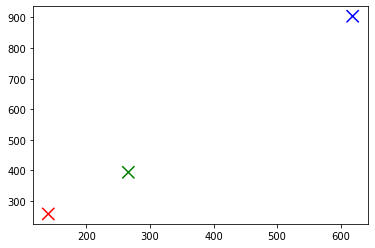

In [ ]:
# Graph the centroids.
# Source: https://stackoverflow.com/a/61181798

centroids_x = k_order_centroids[:,0]
centroids_y = k_order_centroids[:,1]

plt.scatter(centroids_x,centroids_y,marker = "x", s=150,linewidths = 5, zorder = 10, c=['green', 'red','blue'])

In [ ]:
final_df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Columns: 1090 entries, abl to yet
dtypes: float64(1090)
memory usage: 204.5 KB


[-0.06485805 -0.10885035 -0.12110007 -0.055972   -0.10128564 -0.13875342
 -0.05078044 -0.04856871 -0.0513402   0.18398458  0.07336056 -0.04942838
  0.01935665  0.14257705 -0.1314615  -0.0621063  -0.1844422 ] [-0.213835    0.0828819   0.06015676 -0.08458484 -0.24961823 -0.16338344
 -0.1766767  -0.24008049 -0.35357087 -0.09688803  0.15452283 -0.13084639
 -0.14717989 -0.17672655 -0.03405991 -0.10350836 -0.20239269]


[-0.4125885  -0.07742728 -0.43941372] [0.44338636 0.27594989 0.51974969]


[0.13548833 0.57206103 0.3882633  0.58328527] [0.32890053 0.19893286 0.07710623 0.23176434]




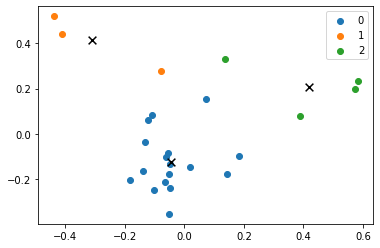

In [ ]:
# Source: https://www.askpython.com/python/examples/plot-k-means-clusters-python

#Importing required modules
 
#from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import numpy as np
 
#Load Data
#data = load_digits().data
data = final_df_test
pca = PCA(n_components=2)

#Transform the data
df = pca.fit_transform(data)

#Import KMeans module
from sklearn.cluster import KMeans
 
#Initialize the class object
kmeans = KMeans(n_clusters= 3)
 
#predict the labels of clusters.
label = kmeans.fit_predict(df)
 
#Getting unique labels
u_labels = np.unique(label)

#Getting the Centroids
centroids = kmeans.cluster_centers_
u_labels = np.unique(label)

#plotting the results:
for i in u_labels:
    plt.scatter(df[label == i , 0] , df[label == i , 1] , marker='o', label = i)
    # for x,y in zip(df[label == i , 0],df[label == i , 1]):

    #     label = f"({x},{y})"

    #     plt.annotate(label, # this is the text
    #                 (x,y), # these are the coordinates to position the label
    #                 textcoords="offset points", # how to position the text
    #                 xytext=(0,10), # distance from text to points (x,y)
    #                 ha='center') # horizontal alignment can be left, right or center
plt.scatter(centroids[:,0] , centroids[:,1] , s = 60, color = 'black', marker='x')
# zip joins x and y coordinates in pairs
for i in u_labels:

    #label = i

    print(df[label == i , 0],df[label == i , 1])
    print("\n")

    # plt.annotate(label, # this is the text
    #              (df[label == i , 0],df[label == i , 1]), # these are the coordinates to position the label
    #              textcoords="offset points", # how to position the text
    #              xytext=(0,10), # distance from text to points (x,y)
    #              ha='center') # horizontal alignment can be left, right or center

plt.legend()
plt.show()